11599
501
501
501
0.05186146796243477 19.282138344489937


/home/elinfi/MasterCode/src/class/mid_point_log_norm.py:16: RuntimeWarning: invalid value encountered in log2
  return np.ma.array(np.interp(self.log(result), x, y), mask=result.mask, copy=False)


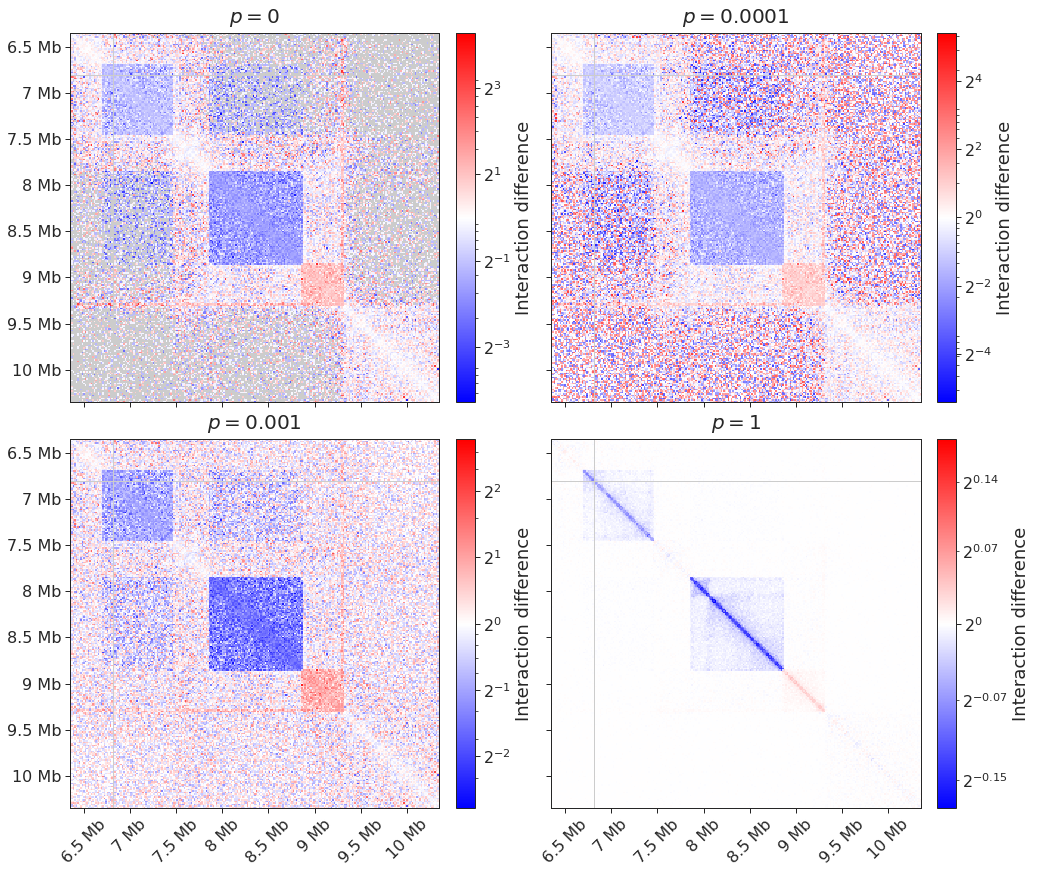

In [45]:
import os
import sys
import cooltools.lib.plotting
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')
sys.path.insert(2, '/home/elinfi/MasterCode/plot/func')

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pretty_plotting as pplot

from copy import copy
from matplotlib.ticker import LogLocator, LogFormatterSciNotation, LogFormatterMathtext
from mid_point_log_norm import MidPointLogNorm
from matplotlib.colors import TwoSlopeNorm, LogNorm

PATH_DIFF = '/home/elinfi/MasterCode/data/simulations/comparison'
PATH_IMG = 'simulations/pdf/comparison'
REGION = 'chr10:6351511-10351511'
#EXTENSION = '_tad_1.4_2_1.7'
#EXTENSION = '_k_2'
#EXTENSION = '_tad_2_3_4_tadtad_3_stripe_2'
#EXTENSION = '_tad_2_0.5_3_tadtad_2_stripe_3'
EXTENSION = '_tad_2_3_0.5_tadtad_2_stripe_0.5'

################################################################################
# STYLE SETTINGS ###############################################################
################################################################################

# use seaborn style
sns.set_theme('paper')
sns.set_style('ticks')

# set extent and ticks label
extent = pplot.region2extent(REGION)    
locator2 = LogLocator(base=2)
formatter2 = LogFormatterMathtext(base=2)

# set font sizes
pplot.font_size(16, 18, 20)

# set colormap with ignored nan-values
bwr = copy(plt.cm.bwr)
bwr.set_bad('#cccccc', 1.0)

fall = copy(plt.get_cmap('fall'))
fall.set_bad('w', 1.0)

################################################################################
# PSEUDOCOUNT 0, 0.0001, 0.001, 1 SYM ##########################################
################################################################################

p0 = np.load(os.path.join(PATH_DIFF, REGION + EXTENSION + '_ratio.npy'))
p1 = np.load(os.path.join(PATH_DIFF, REGION + EXTENSION + f'_p_{0.0001}.npy'))
p2 = np.load(os.path.join(PATH_DIFF, REGION + EXTENSION + f'_p_{0.001}.npy'))
p3 = np.load(os.path.join(PATH_DIFF, REGION + EXTENSION + f'_p_{1}.npy'))

print(np.sum(np.isnan(p0)))
print(np.sum(np.isnan(p1)))
print(np.sum(np.isnan(p2)))
print(np.sum(np.isnan(p3)))

# create subplot
f, axs = plt.subplots(figsize=(14.2, 11.9),
                      nrows=2,
                      ncols=2,
                      sharex=True, sharey=True)

# adjust subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.065, 
                    right=0.93, 
                    top=0.97, 
                    wspace=0.15,
                    hspace=0.1)

# no pseudocount
ax = axs[0, 0]
vmin = min(np.nanmin(p0[p0 > 0]), 1/np.nanmax(p0))
vmax = max(np.nanmax(p0), 1/np.nanmin(p0[p0 > 0]))
print(vmin, vmax)
im = ax.matshow(p0,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 0.0001
ax = axs[0, 1]
vmin = min(np.nanmin(p1), 1/np.nanmax(p1))
vmax = max(np.nanmax(p1), 1/np.nanmin(p1))
im = ax.matshow(p1,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0.0001$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 0.001
ax = axs[1, 0]
vmin = min(np.nanmin(p2), 1/np.nanmax(p2))
vmax = max(np.nanmax(p2), 1/np.nanmin(p2))

im = ax.matshow(p2,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0.001$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 1
ax = axs[1, 1]
vmin = min(np.nanmin(p3), 1/np.nanmax(p3))
vmax = max(np.nanmax(p3), 1/np.nanmin(p3))
im = ax.matshow(p3,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04, 
                    label='Interaction difference',
                    ax=ax, ticks=locator2, format=formatter2)
#cbar.ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
cbar.ax.yaxis.set_major_formatter(mpl.ticker.LogFormatterMathtext(base=2, labelOnlyBase=True))
cbar.ax.yaxis.set_minor_formatter(mpl.ticker.LogFormatterMathtext(base=2))

ax.set_title("$p = 1$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

11599
501
501
501
0.053521496507140186 18.68408144877997


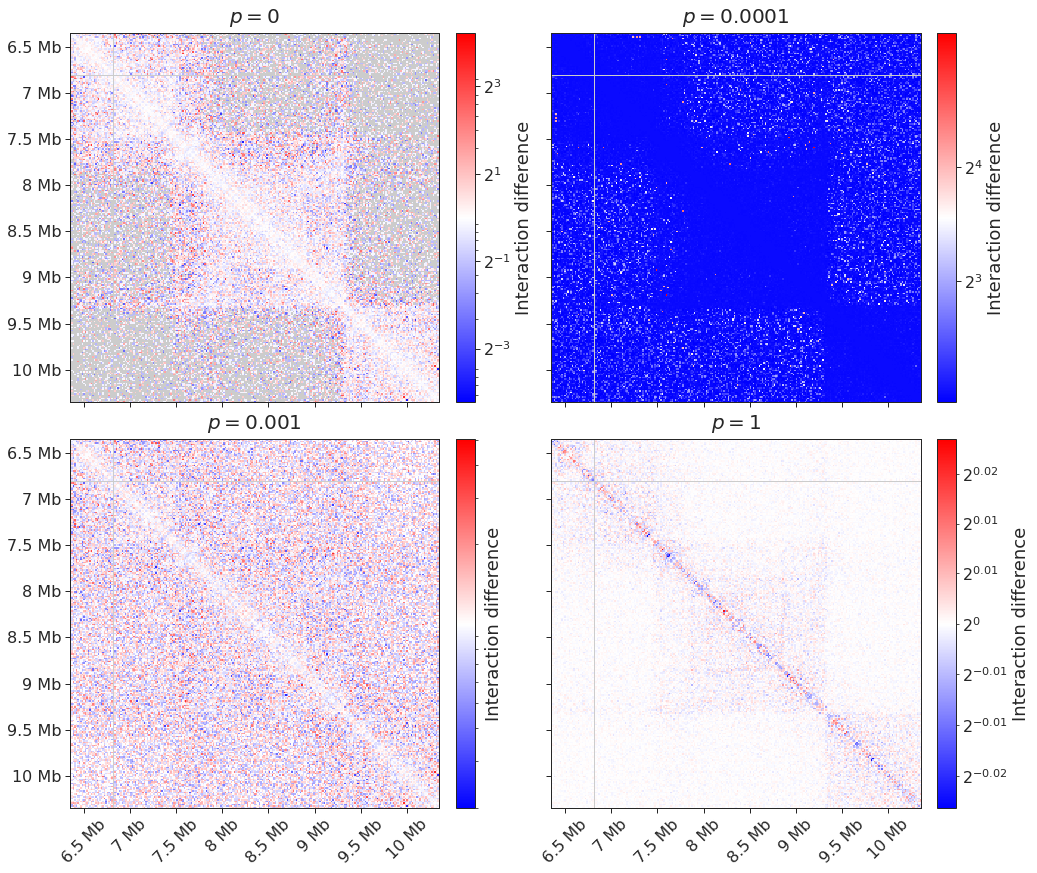

In [ ]:
import os
import sys
import cooltools.lib.plotting
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')
sys.path.insert(2, '/home/elinfi/MasterCode/plot/func')

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pretty_plotting as pplot

from copy import copy
from matplotlib.ticker import LogLocator, LogFormatterSciNotation, LogFormatterMathtext
from mid_point_log_norm import MidPointLogNorm
from matplotlib.colors import TwoSlopeNorm, LogNorm

PATH_DIFF = '/home/elinfi/MasterCode/data/replicates/comparison'
PATH_REPS = '/home/elinfi/MasterCode/data/replicates'
PATH_IMG = 'replicates/pdf/comparison'
REGION = 'chr10:6351511-10351511'

################################################################################
# STYLE SETTINGS ###############################################################
################################################################################

# use seaborn style
sns.set_theme('paper')
sns.set_style('ticks')

# set extent and ticks label
extent = pplot.region2extent(REGION)    
locator2 = LogLocator(base=2)
#formatter2 = LogFormatterSciNotation(base=2)
formatter2 = LogFormatterMathtext(base=2)

# set font sizes
pplot.font_size(16, 18, 20)

# set colormap with ignored nan-values
bwr = copy(plt.cm.bwr)
bwr.set_bad('#cccccc', 1.0)

fall = copy(plt.get_cmap('fall'))
fall.set_bad('w', 1.0)

################################################################################
# PSEUDOCOUNT 0, 0.0001, 0.001, 1 ##############################################
################################################################################

p0 = np.load(os.path.join(PATH_DIFF, f'{REGION}_ratio.npy'))
p1 = np.load(os.path.join(PATH_DIFF, f'{REGION}_p_0.0001.npy'))
p2 = np.load(os.path.join(PATH_DIFF, f'{REGION}_p_0.001.npy'))
p3 = np.load(os.path.join(PATH_DIFF, f'{REGION}_p_1.npy'))

print(np.sum(np.isnan(p0)))
print(np.sum(np.isnan(p1)))
print(np.sum(np.isnan(p2)))
print(np.sum(np.isnan(p3)))

# create subplot
f, axs = plt.subplots(figsize=(14.2, 11.9),
                      nrows=2,
                      ncols=2,
                      sharex=True, sharey=True)

# adjust subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.065, 
                    right=0.93, 
                    top=0.97, 
                    wspace=0.15,
                    hspace=0.1)

# no pseudocount
ax = axs[0, 0]
vmin = min(np.nanmin(p0[p0 > 0]), 1/np.nanmax(p0))
vmax = max(np.nanmax(p0), 1/np.nanmin(p0[p0 > 0]))
print(vmin, vmax)
im = ax.matshow(p0,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 0.0001
ax = axs[0, 1]
vmin = min(np.nanmin(p1), 1/np.nanmax(p1))
vmax = max(np.nanmax(p1), 1/np.nanmin(p1))
im = ax.matshow(p1-p2,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0.0001$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 0.001
ax = axs[1, 0]
vmin = min(np.nanmin(p2), 1/np.nanmax(p2))
vmax = max(np.nanmax(p2), 1/np.nanmin(p2))
im = ax.matshow(p2,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Interaction difference', 
             ax=ax, ticks=locator2, format=formatter2)
ax.set_title("$p = 0.001$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

# pseudocount = 1
ax = axs[1, 1]
vmin = min(np.nanmin(p3), 1/np.nanmax(p3))
vmax = max(np.nanmax(p3), 1/np.nanmin(p3))
im = ax.matshow(p3,
                norm = MidPointLogNorm(midpoint=1, vmin=vmin, vmax=vmax, log=np.log2),
                cmap = bwr,
                extent = extent)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04, 
                    label='Interaction difference',
                    ax=ax, ticks=locator2, format=formatter2)
#cbar.ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
cbar.ax.yaxis.set_major_formatter(mpl.ticker.LogFormatterMathtext(base=2, labelOnlyBase=True))
cbar.ax.yaxis.set_minor_formatter(mpl.ticker.LogFormatterMathtext(base=2, ))

ax.set_title("$p = 1$", y=1.01)

pplot.format_ticks(ax)
pplot.background_color(ax, 'gray-light')

In [38]:
import os
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')
sys.path.insert(2, '/home/elinfi/MasterCode/plot/func')
sys.path.insert(3, '/home/elinfi/MasterCode/notebooks/clustering')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pretty_plotting as pplot

from rand_index import rand_index
from mid_point_log_norm import MidPointLogNorm

PATH_IN = '/home/elinfi/MasterCode/data/simulations/comparison/'
PATH_OUT = '/home/elinfi/MasterCode/img/statistics/'
REGION = 'chr10:6351511-10351511'
SYNTHETIC = 'tad_2_3_0.5_tadtad_2_stripe_0.5'
EXTENSION = ''
PATH_EXACT = '/home/elinfi/MasterCode/data/simulations/chr10:6351511-10351511_tad_2_3_4_tadtad_5_stripe_6_fasit.npy'

true_clusters = np.load(PATH_EXACT)
tad1 = true_clusters == 2
tad2 = true_clusters == 3
tad3 = true_clusters == 4
tadtad = true_clusters == 5
stripe = true_clusters == 6

p0 = np.load(os.path.join(PATH_IN, f'{REGION}_{SYNTHETIC}_ratio.npy'))
p1 = np.load(os.path.join(PATH_IN, f'{REGION}_{SYNTHETIC}_p_{0.0001}.npy'))
p2 = np.load(os.path.join(PATH_IN, f'{REGION}_{SYNTHETIC}_p_{0.001}.npy'))
p3 = np.load(os.path.join(PATH_IN, f'{REGION}_{SYNTHETIC}_p_{1}.npy'))
print(np.log10(2))
print(np.nanmean(p0[tad1]))
print(np.nanmean(p1[tad1]))
print(np.nanmean(p2[tad1]))
print(np.nanmean(p3[tad1]))
print(p0[tad1].reshape(0,70-22).shape)

0.3010299956639812
0.5344789343738319
0.5376837031922916
0.5656401140054798
0.990224038315992


ValueError: cannot reshape array of size 2304 into shape (0,48)

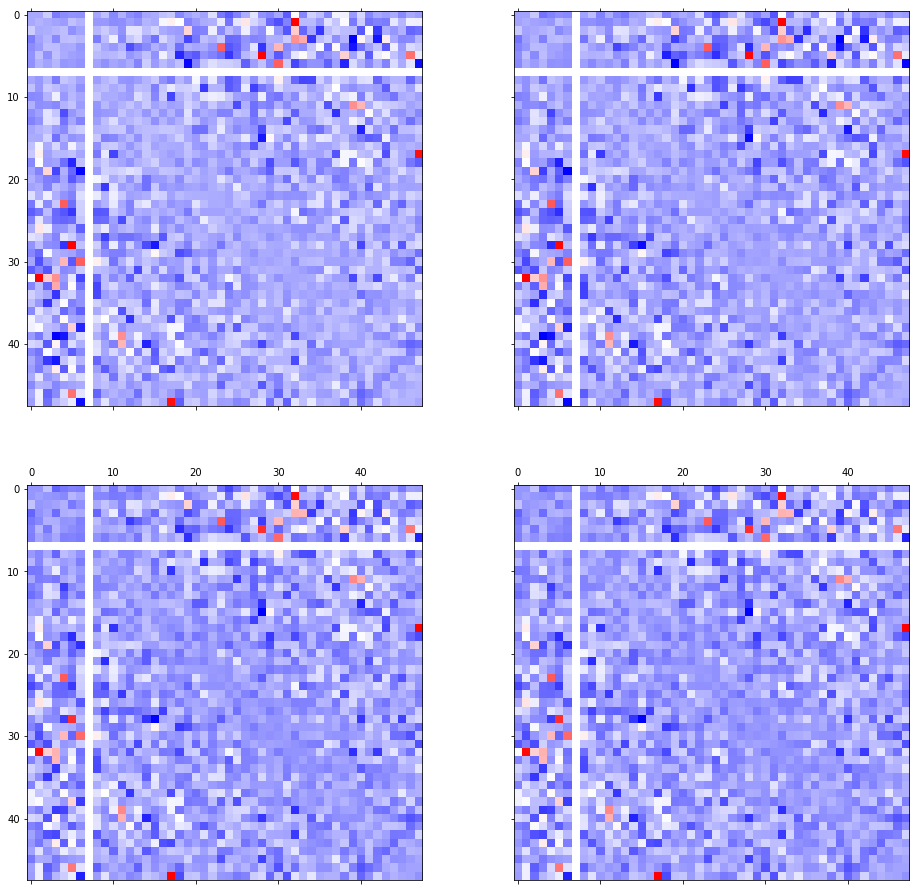

In [28]:
f, axs = plt.subplots(figsize=(16, 16),
                      nrows=2,
                      ncols=2,
                      sharex=True, sharey=True)
ax = axs[0, 0]
ax.matshow(p0[tad1].reshape(70-22,70-22),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')

ax = axs[0, 1]
ax.matshow(p1[tad1].reshape(70-22,70-22),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 0]
ax.matshow(p2[tad1].reshape(70-22,70-22),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 1]
ax.matshow(p2[tad1].reshape(70-22,70-22),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')

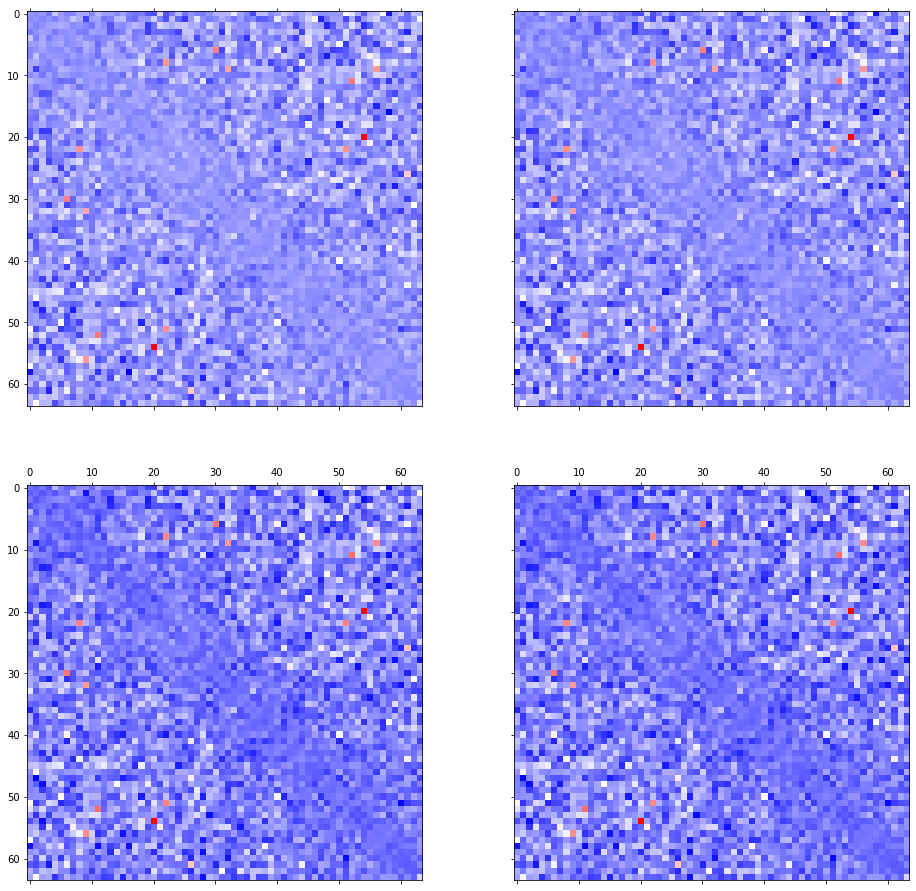

In [29]:
f, axs = plt.subplots(figsize=(16, 16),
                      nrows=2,
                      ncols=2,
                      sharex=True, sharey=True)
ax = axs[0, 0]
a = 158-94
ax.matshow(p0[tad2].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')

ax = axs[0, 1]
ax.matshow(p1[tad2].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 0]
ax.matshow(p2[tad2].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 1]
ax.matshow(p2[tad2].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')

28.982753492378876
841


ValueError: cannot reshape array of size 840 into shape (29,28)

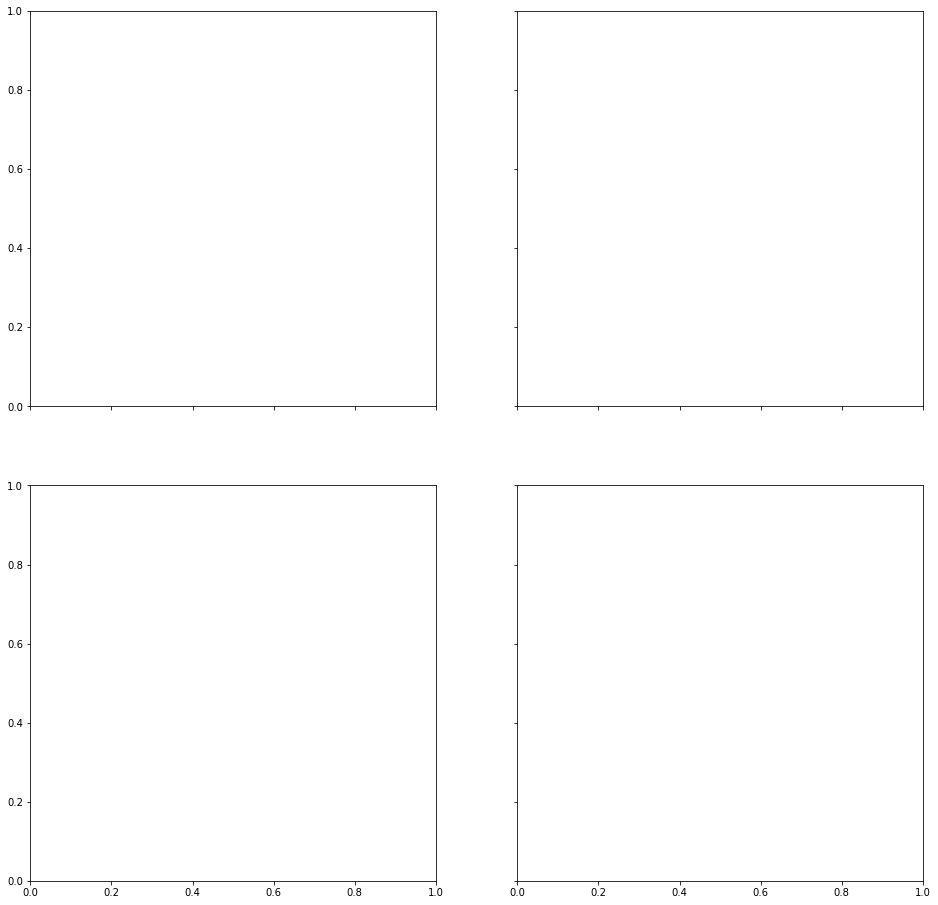

In [36]:
f, axs = plt.subplots(figsize=(16, 16),
                      nrows=2,
                      ncols=2,
                      sharex=True, sharey=True)
ax = axs[0, 0]
a = 186-157
print(np.sqrt(840))
print(29*29)
ax.matshow(p0[tad3].reshape(a, a-1),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')

ax = axs[0, 1]
ax.matshow(p1[tad3].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 0]
ax.matshow(p2[tad3].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')


ax = axs[1, 1]
ax.matshow(p2[tad3].reshape(a, a),
            norm = MidPointLogNorm(midpoint=1),
          cmap='bwr')